In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy as sp
import pandas as pd
from pandas.io.json import json_normalize
import json
import datetime
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tslearn.clustering import KShape
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
def convert_datetime(name):
    json = pd.read_json('data/downloads/' + name + '_download.json')
    df_json = pd.DataFrame(json['downloads'])
    df = json_normalize(df_json['downloads'])
    df['day'] = pd.to_datetime(df['day'], infer_datetime_format=True)
    df.index = df['day']
    return df

def convert_week_datetime(name):
    df = convert_datetime(name)
    df_w = round(df.resample(rule="W").mean())
    return df_w

def convert_ts(name):
    df_w = convert_week_datetime(name)
    ts = sm.tsa.seasonal_decompose(df_w['downloads'].values, freq=52)
    return ts

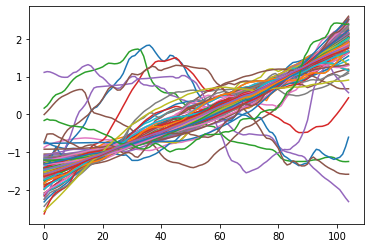

In [23]:
assets = pd.read_json('data/assets/over1000packages.json')
for i in assets.values:
    ts = convert_ts(i[0])
    ts = ts.trend[26:131]
    d = TimeSeriesScalerMeanVariance(mu=0. , std=1.).fit_transform(ts)
    plt.plot(d[0])

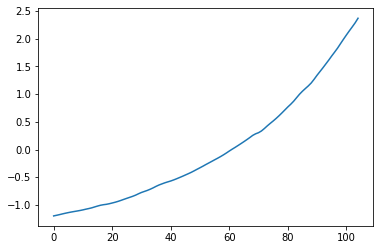

In [22]:
plt.plot(d[0])

In [24]:
assets = pd.read_json('data/assets/over1000packages.json')

X_train = np.empty([105, 1])
for i, v in enumerate(assets.values):
    ts = convert_ts(v[0])
    ts = ts.trend[26:131]
    d = TimeSeriesScalerMeanVariance(mu=0. , std=1.).fit_transform(ts)
    X_train = np.concatenate([X_train, d[0]])

print('x-train', X_train.shape)

# km = TimeSeriesKMeans(n_clusters=3, verbose=True, random_state=0)
# y_pred = km.fit_predict(X_train)


# plt.figure()
# for yi in range(3):
#     plt.subplot(3, 3, yi + 1)
#     for xx in X_train[y_pred == yi]:
#         plt.plot(xx.ravel(), "k-", alpha=.2)
#     plt.plot(km.cluster_centers_[yi].ravel(), "r-")
#     plt.xlim(0, sz)
#     plt.ylim(-4, 4)
#     if yi == 1:
#         plt.title("Euclidean $k$-means")

# plt.tight_layout()
# plt.show()

xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (105, 1)
xx_train (

(106, 105, 1)
12.438 --> 8.351 --> 8.261 --> 8.261 --> 


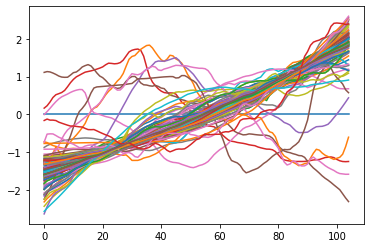

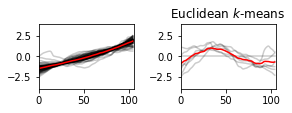

In [55]:
c = np.split(X_train, 106)
# print(len(c))
# print(len(c[104]))
d = np.array(c)
print(d.shape)

sz = d.shape[1]
seed = 0
np.random.seed(seed)
cluster_num = 3
km = TimeSeriesKMeans(n_clusters=cluster_num, verbose=True, random_state=seed)
y_pred = km.fit_predict(d)


for i in d:
    plt.plot(i)

plt.figure()
for yi in range(cluster_num):
    plt.subplot(3, 3, yi + 1)
    for xx in d[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 1:
        plt.title("Euclidean $k$-means")

plt.tight_layout()
plt.show()


In [49]:
# ダウンロード数のトレンドが成長期、成熟期、衰退期とかにわけらそう
# 一方、他のパラメタの要因から予測する手法を編出すの
print(y_pred)

[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
